Individual Planning Report Group 43 - Anson Ng Student ID (34713040) 


**Data description**

In [2]:
#load library first
library(tidyverse)
library(repr)
library(tidymodels)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


There are two datasets the player dataset, and the session dataset. The player dataset is the dataset that contains information regarding each player that has logged on to play the game.

This player dataset includes
| Variable | Type | Description |
|----------|------|-------------|
|experience|character|Gaming skill level: Beginner, Amateur, Pro, Veteran|
|name|character|Player’s real name|
|hashedEmail|character|Unique player ID (hashed email)|
|gender|character|Player’s gender: Male, Female, Other, Prefer not to say|
|subscribe|logical|Whether player subscribed to newsletter (TRUE/FALSE)|
|played_hours|numeric|Total hours played|
|age|numeric|Player’s age (some NAs present)|

It is important to note 
- age contains missing values; we must handle NAs.
- gender contains categories beyond Male/Female, which may need filtering.
- Some variables (e.g., name, hashedEmail) are identifiers and not predictive.

The session dataset include
| Variable | Type | Description |
|----------|------|-------------|
|hashedEmail|character|Player identifier|
|start_time|datetime|Session start (date & time)|
|end_time|datetime|Session end (date & time)|
|original_start_time|numeric|Start time in UNIX milliseconds|
|original_end_time|numeric|End time in UNIX milliseconds|

It is important to note 
- Each player can have multiple sessions.
- Start and end times are recorded in both datetime and UNIX formats, which may require wrangling.
- Since played_hours already totals each player’s game time, session-level start and end times are unnecessary for predicting subscription and would add redundant complexity.

With the steps detailed in later steps, we will be able to determine the mean value of certain quantitative data within our tables include 
1. "played_hours" the average amount of hours played being "5.85 (hours)"  
2. "age"   the average age of players being "21.14 (years old)"

**Question** 

**Broad Question:**
What player characteristics and behaviors are most predictive of subscribing to a game-related newsletter, and how do these features differ between player types?

**Specific Question:**
Which is more predictive of subscription: a player’s gender or played_hours?

**Data and Approach:**
We will compare the predictive ability of gender and played_hours for subscription. Only the players dataset is required to determine predictability. Steps include:
- Filter missing values
- Select relevant columns: played_hours, gender, subscribe
- Convert gender to categorical and ensure played_hours is numeric
- applying a linear regression model. 
    

**Exploring Data Analysis**

The summary of quantitiave variables "played_hours" and "age" 


the R commands as stated below to wrangle and summarize the data. 

In [8]:
#load the datasets
players <- read_csv("data/players.csv")
sessions <- read_csv("data/sessions.csv")

players
sessions    

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


Data wrangling ensures variables are clean and usable. To prepare for exploratory visualizations, we will select relevant columns, remove missing or invalid values, and convert variables to the appropriate type.

In [9]:
#filter and select to find (mean) for "played_hours" and "age"
mean_data <- players |> 
select(played_hours, Age) |> 
summarize(mean_played_hours = round(mean(played_hours,na.rm = TRUE ),2), mean_age = round(mean(Age,  na.rm = TRUE),2))

mean_data

mean_played_hours,mean_age
<dbl>,<dbl>
5.85,21.14


In [10]:
# wrangling the data
wrangled_players <- players |> 
  select(subscribe, played_hours, gender) |>
filter(!is.na(played_hours), !is.na(gender), !is.na(subscribe)) |> 
  mutate(subscribe = as.factor(subscribe),gender = as.factor(gender), played_hours = as.numeric(played_hours))

wrangled_players 

subscribe,played_hours,gender
<fct>,<dbl>,<fct>
TRUE,30.3,Male
TRUE,3.8,Male
FALSE,0.0,Male
⋮,⋮,⋮
FALSE,0.0,Prefer not to say
FALSE,2.3,Male
TRUE,0.2,Other


a few exploratory visualizations 

In [11]:
gender_ver_subscribe <- wrangled_players |>
ggplot(aes(x=gender, fill = subscribe)) + 
geom_bar() + 
labs(x = "gender", y="count", fill = "subscribe", title = "Subscription by Gender" ) + 
theme_minimal()

summary_subscribe <- wrangled_players |>
  group_by(subscribe) |>
  summarise(mean_hours = mean(played_hours, na.rm = TRUE))

hours_ver_subscribe <- ggplot(summary_subscribe, aes(x = subscribe, y = mean_hours, fill = subscribe)) +
  geom_col() +
  labs(title = "Average Played Hours by Subscription Status", x = "Subscription Status",y = "Average Played Hours (hours)",fill = "Subscribed")


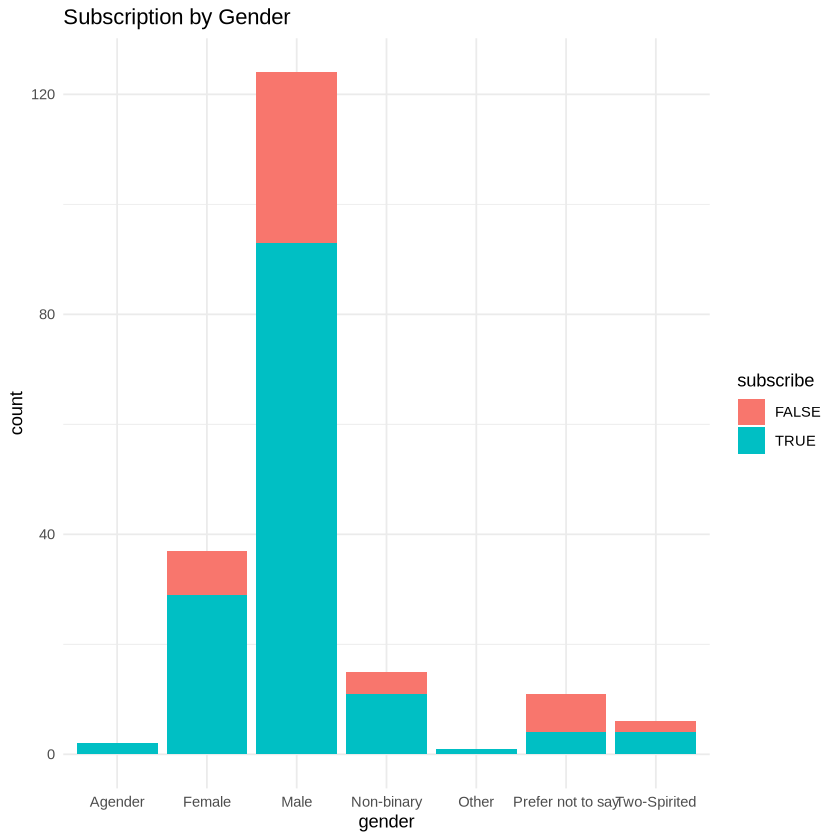

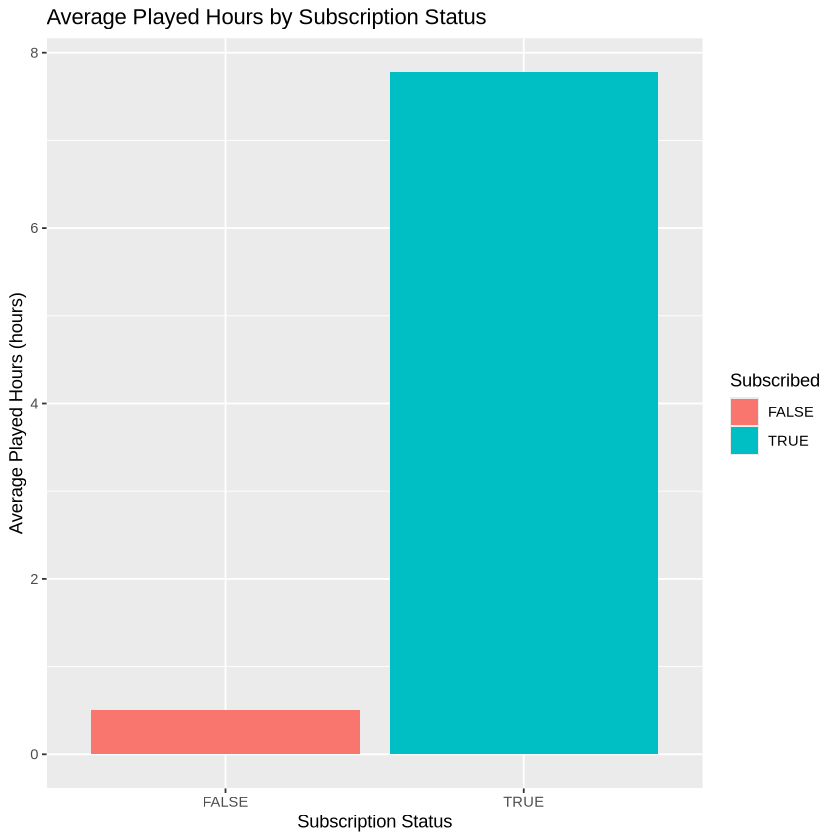

In [12]:
gender_ver_subscribe
hours_ver_subscribe

The first visual shows that males are overrepresented, which may bias predictions. 

The second visual indicates that subscribers have higher average played hours, suggesting it is a strong predictor of subscription.

**Method and Plan**

**Question** 
 which is is more predictive in determining whether one would subcribe, the played_hours or the gender

 **Method**
 Create two linear regression models for each variable played_hours and gender. With the linear regression model, we can produce a RMSE value that will demontrate the predictor with a lower value to be more predictive of subscription likelihood. Additionally the coefficients will show how changes in the predictor affect subscription probability ( We must remember to convert the subscription to binary 1/0)

**Assumptions**
Assumptions that will need to be made includes 
- the relationship between each variable and subscription is linear
- there aren't too many outliers
- there are observations for all variables

**Potential limitations or witnesses**
- Binary outcome may bias toward majority class like male
- Non-linear relationships not captured thus an over or under estimation. 
 **Plan** 
	1.	Split wrangled data into 60% training and 40% testing.
	2.	Use K-fold cross-validation on the training set to tune and validate the model.
	3.	Fit linear regression models separately for played_hours and gender.
	4.	Predict on the testing set and calculate RMSE.
	5.	Compare models: lower RMSE and larger coefficients indicate stronger predictive power.